In [34]:
#train 181 vali 61
#test  61
import tensorflow.keras as tf
from sklearn import preprocessing
import random
import pandas as pd
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
dataset =  pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None,names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"],na_values='?')

In [36]:
random.seed(10)
dataset = dataset.fillna(random.random())

In [37]:
input=dataset.iloc[:,0:13]
output = 1*dataset.iloc[:,13]>0
output=output.to_numpy()

In [9]:
dataset_scale_input=preprocessing.scale(input)
dataset_normalized_input=preprocessing.normalize(input, norm='l2')

In [40]:
train_data=dataset_scale_input[:182]
val_data=dataset_scale_input[182:243]
test_data=dataset_scale_input[243:304]

train_outputdata=output[:182]
val_outputdata=output[182:243]
test_outputdata=output[243:304]

In [180]:
model = Sequential()
model.add(Dense(12, input_shape=(train_data.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


In [185]:
history = model.fit(train_data, train_outputdata ,epochs=200, batch_size=1, verbose=1,
                    validation_data = (val_data, val_outputdata))

Train on 182 samples, validate on 61 samples
Epoch 1/50
182/182 [==============================] - 1s 3ms/sample - loss: 0.0184 - mae: 0.0210 - val_loss: 0.1689 - val_mae: 0.1842
Epoch 2/50
182/182 [==============================] - 1s 3ms/sample - loss: 0.0183 - mae: 0.0209 - val_loss: 0.1670 - val_mae: 0.1805
Epoch 3/50
182/182 [==============================] - 0s 2ms/sample - loss: 0.0184 - mae: 0.0211 - val_loss: 0.1645 - val_mae: 0.1800
Epoch 4/50
182/182 [==============================] - 0s 3ms/sample - loss: 0.0183 - mae: 0.0209 - val_loss: 0.1686 - val_mae: 0.1823
Epoch 5/50
182/182 [==============================] - 0s 3ms/sample - loss: 0.0182 - mae: 0.0208 - val_loss: 0.1655 - val_mae: 0.1809
Epoch 6/50
182/182 [==============================] - 0s 2ms/sample - loss: 0.0183 - mae: 0.0208 - val_loss: 0.1672 - val_mae: 0.1825
Epoch 7/50
182/182 [==============================] - 1s 3ms/sample - loss: 0.0182 - mae: 0.0206 - val_loss: 0.1667 - val_mae: 0.1815
Epoch 8/50
182/18

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


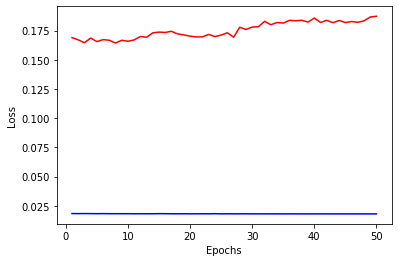

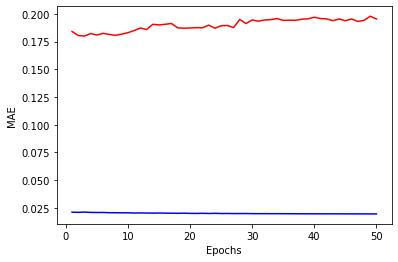

In [186]:
import matplotlib.pyplot as plt

print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

time = range(1,len(loss)+1)

plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(time, mae, 'b-')
plt.plot(time, val_mae, 'r-')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

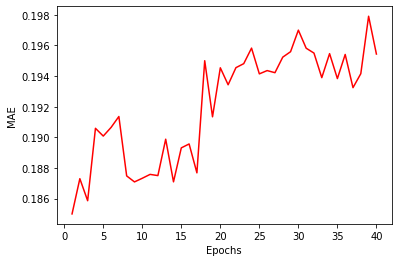

In [187]:
# Cut off the first few data points

short_val_mae = val_mae[10:]

plt.plot(range(1,len(short_val_mae)+1), short_val_mae, 'r-')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

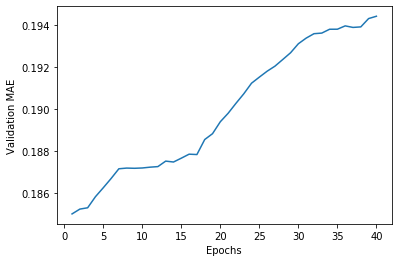

In [188]:
# Smoothen the previous curve for clarity

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_val_mae = smooth_curve(val_mae[10:])

plt.plot(range(1, len(smooth_val_mae) + 1), smooth_val_mae)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [192]:
train_data=dataset_normalized_input[:182]
val_data=dataset_normalized_input[182:243]
test_data=dataset_normalized_input[243:304]

In [194]:
model = Sequential()
model.add(Dense(12, input_shape=(train_data.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [195]:
history = model.fit(train_data, train_outputdata ,epochs=50, batch_size=1, verbose=1,
                    validation_data = (val_data, val_outputdata))

Train on 182 samples, validate on 61 samples
Epoch 1/50
182/182 [==============================] - 1s 7ms/sample - loss: 0.2521 - mae: 0.5020 - val_loss: 0.2491 - val_mae: 0.4990
Epoch 2/50
182/182 [==============================] - 1s 4ms/sample - loss: 0.2494 - mae: 0.4993 - val_loss: 0.2484 - val_mae: 0.4983
Epoch 3/50
182/182 [==============================] - 1s 4ms/sample - loss: 0.2491 - mae: 0.4989 - val_loss: 0.2478 - val_mae: 0.4976
Epoch 4/50
182/182 [==============================] - 1s 3ms/sample - loss: 0.2489 - mae: 0.4986 - val_loss: 0.2473 - val_mae: 0.4970
Epoch 5/50
182/182 [==============================] - 1s 3ms/sample - loss: 0.2486 - mae: 0.4983 - val_loss: 0.2469 - val_mae: 0.4965
Epoch 6/50
182/182 [==============================] - 1s 3ms/sample - loss: 0.2485 - mae: 0.4980 - val_loss: 0.2465 - val_mae: 0.4960
Epoch 7/50
182/182 [==============================] - 0s 3ms/sample - loss: 0.2483 - mae: 0.4978 - val_loss: 0.2461 - val_mae: 0.4955
Epoch 8/50
182/18

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


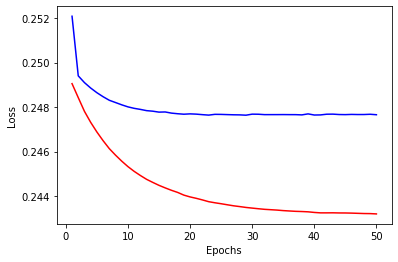

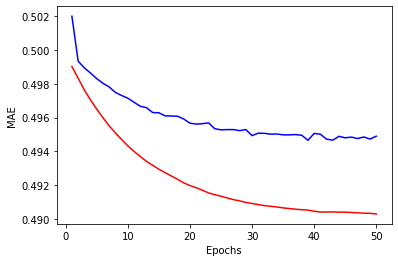

In [196]:
import matplotlib.pyplot as plt

print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

time = range(1,len(loss)+1)

plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(time, mae, 'b-')
plt.plot(time, val_mae, 'r-')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

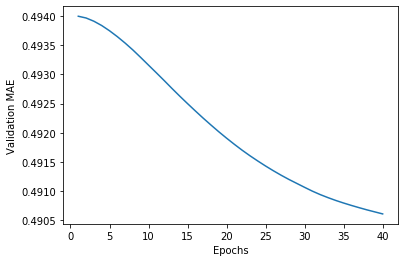

In [197]:
# Smoothen the previous curve for clarity

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_val_mae = smooth_curve(val_mae[10:])

plt.plot(range(1, len(smooth_val_mae) + 1), smooth_val_mae)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()